In [2]:
#dependencias
import numpy as np
import pandas as pd
import sklearn.linear_model as linear
from sklearn.model_selection import train_test_split as split
import matplotlib.pyplot as plt
import seaborn as sb

# 1er dataset: info de precios de casas en california (https://www.kaggle.com/datasets/camnugent/california-housing-prices)

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean      -1.046021      0.849421            0.550636      0.067052   
std        0.017528      0.050926            0.242150      0.055577   
min       -1.087831      0.775685            0.019231      0.000051   
25%       -1.065524      0.808820            0.346154      0.036877   
50%       -1.036567      0.816687            0.557692      0.054095   
75%       -1.032368      0.899166            0.711538      0.079934   
max       -1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean         0.083455      0.039935      0.082117       0.258076   
std          0.065382      0.031759      0.062857       0.126619   
min          0.000155      0.000084      0.000164       0.033326   
25%          0.04592

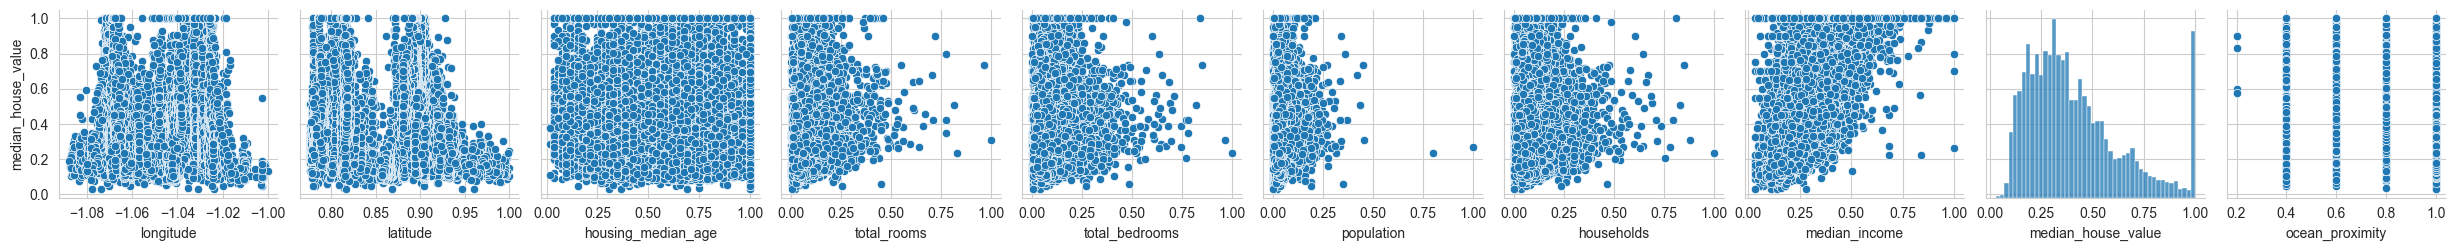

In [22]:
#leyendo el dataset y haciendo un preprocesamiento simple
data1 = pd.read_csv("datasets/housing.csv")

#quitando columnas vacias
data1.dropna(inplace=True)

#para evitar un aviso de pandas al hacer replace
pd.set_option("future.no_silent_downcasting", True)

#transformando los valores categoricos de ocean_proximity (proximidad al oceano) a numericos
data1["ocean_proximity"] = data1["ocean_proximity"].replace(["ISLAND","NEAR OCEAN","NEAR BAY","<1H OCEAN","INLAND"],[1,2,3,4,5])

#normalizando variables
for column in data1.columns:
    data1[column] = data1[column]/abs(data1[column].max())

print(data1.describe())

#haciendo pairplot para ver la relacion entre variables
sb.pairplot(data1,x_vars=data1.columns,y_vars=["median_house_value"])

Scores:
0.6339549593269524
0.6588276443492902

Coeficientes:
Columna longitude: -8.804814575566258
Columna latitude: -3.180317776830438
Columna housing_median_age: 0.12325375845047226
Columna total_rooms: -0.5980681215838309
Columna total_bedrooms: 1.376674786752316
Columna population: -3.0306180048358744
Columna households: 0.7556419367013809
Columna median_income: 1.1764782672473935
Columna ocean_proximity: -0.08108021195260418

Ordenada al origen: -6.418576078222419


Text(0.5, 0.98, 'Modelo entrenado con todas las variables')

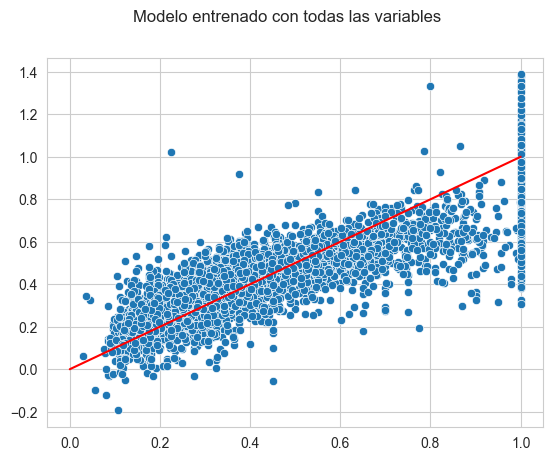

In [46]:
#seleccionando los datos para entrenar el modelo, primero con todas las variables excepto la que vamos a predecir
columnasX = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]
x = data1[columnasX].values
y = data1["median_house_value"].values

#creamos el modelo, dividimos los datos en entrenamiento y test, y lo entrenamos
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print("Scores:")
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))
print()

#mostrando los coeficientes para ver la importancia de cada variable
print("Coeficientes:")
for i in range(len(columnasX)):
    print("Columna "+columnasX[i]+": "+str(linearModel.coef_[i]))
print("\nOrdenada al origen: "+str(linearModel.intercept_))

#comparando las variables predecidas con las reales
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.linspace(0,max(trainY)),y=np.linspace(0,max(trainY)),color=(1,0,0))
plt.suptitle("Modelo entrenado con todas las variables")


Scores:
0.6184911926219241
0.6255572546449178



Text(0.5, 0.98, 'Modelo entrenado con variables de coeficiente mayor a 1')

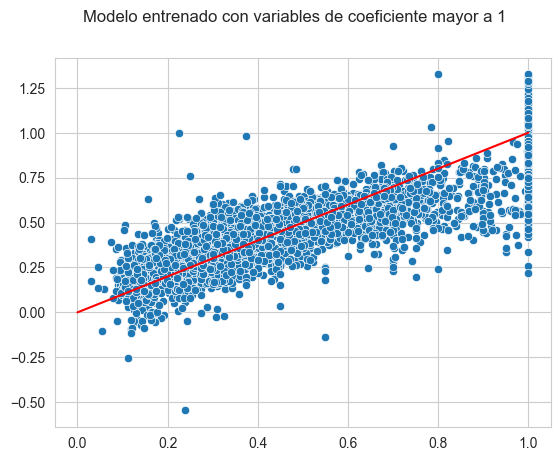

In [47]:
#volviendo a entrenar el modelo con las variables cuyo coeficiente parecio tener cierta importancia (>1)
columnasX = ["longitude","latitude","total_bedrooms","population","median_income"]
x = data1[columnasX].values
y = data1["median_house_value"].values
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print("Scores:")
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))
print()

#comparando las variables predecidas con las reales
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.linspace(0,max(trainY)),y=np.linspace(0,max(trainY)),color=(1,0,0))
plt.suptitle("Modelo entrenado con variables de coeficiente mayor a 1")

Scores:
0.4787645931354997
0.45388263984298494



Text(0.5, 0.98, 'Modelo entrenado con la variable que resalto del pairplot')

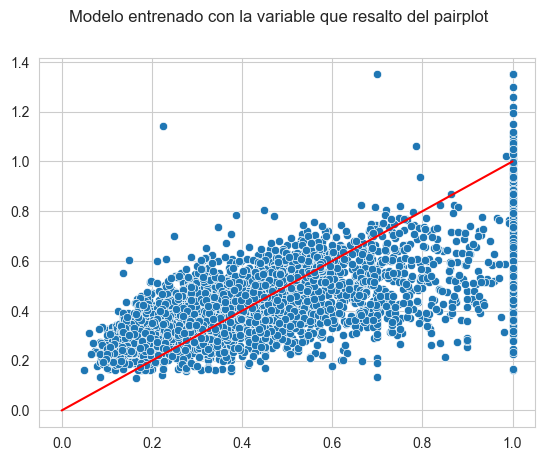

In [55]:
#volviendo a entrenar el modelo con solo la variable que resalto en el pairplot
columnasX = ["median_income"]
x = data1[columnasX].values
y = data1["median_house_value"].values
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print("Scores:")
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))
print()

#comparando las variables predecidas con las reales
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.linspace(0,max(trainY)),y=np.linspace(0,max(trainY)),color=(1,0,0))
plt.suptitle("Modelo entrenado con la variable que resalto del pairplot")

# 2do dataset: dataset de precios de casas para... practicar regresion (https://www.kaggle.com/datasets/prokshitha/home-value-insights)

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

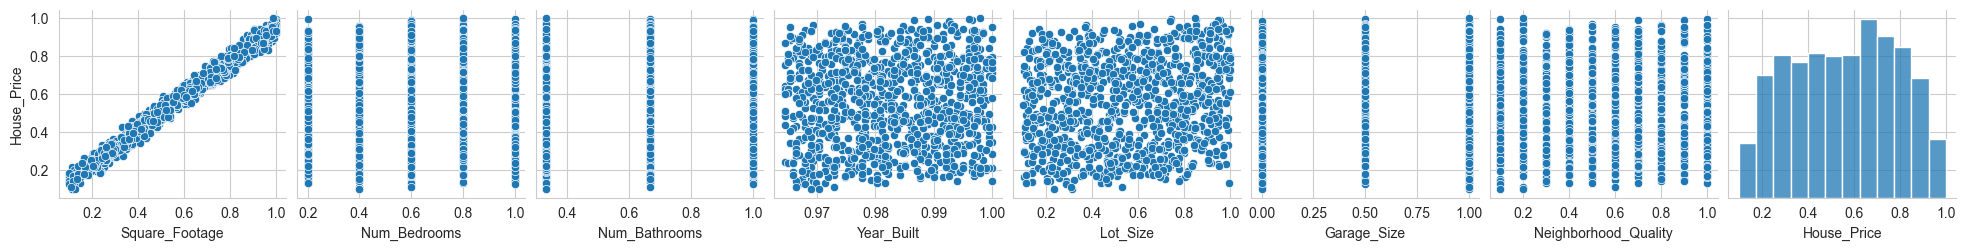

In [37]:
#leyendo el dataset
data2 = pd.read_csv("datasets/house_price_regression_dataset.csv")
print(data2.describe())

#normalizando variables
for column in data2.columns:
    data2[column] = data2[column]/abs(data2[column].max())

#viendo la relacion entre variables con un pairplot
sb.pairplot(data2,x_vars=data2.columns,y_vars=["House_Price"])

Scores:
0.9984317727463838
0.9986677761707347

Coeficientes:
Columna Square_Footage: 0.9028414245146422
Columna Num_Bedrooms: 0.04726697006715856
Columna Num_Bathrooms: 0.02164211723797494
Columna Year_Built: 1.862500224663594
Columna Lot_Size: 0.06888764565498313
Columna Garage_Size: 0.0084438607431317
Columna Neighborhood_Quality: -0.0020214463497566053

Ordenada al origen: -1.8633916454013773


Text(0.5, 0.98, 'Modelo entrenado con todas las variables')

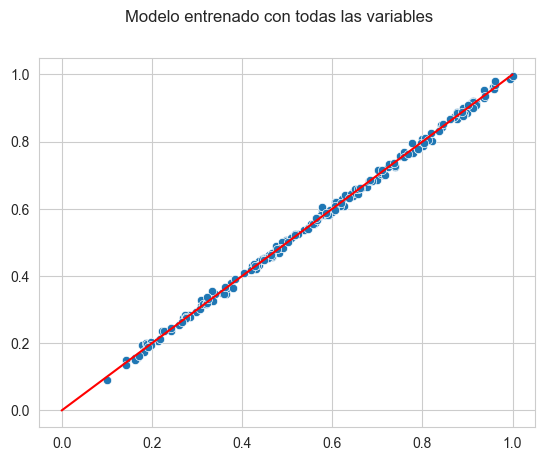

In [48]:
#haciendo entrenamiento de un modelo primero con todas las variables
columnasX = ["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Garage_Size","Neighborhood_Quality"]
x = data2[columnasX].values
y = data2["House_Price"].values

linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print("Scores:")
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))
print()

#observando los coeficientes para ver la importancia de las variables
print("Coeficientes:")
for i in range(len(columnasX)):
    print("Columna "+columnasX[i]+": "+str(linearModel.coef_[i]))
print("\nOrdenada al origen: "+str(linearModel.intercept_))


#comparando los precios reales con los predecidos
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.linspace(0,max(trainY)),y=np.linspace(0,max(trainY)),color=(1,0,0))
plt.suptitle("Modelo entrenado con todas las variables")

Scores:
0.9872399070629507
0.9894400710551584



Text(0.5, 0.98, 'Modelo entrenado con variables de coeficiente alto')

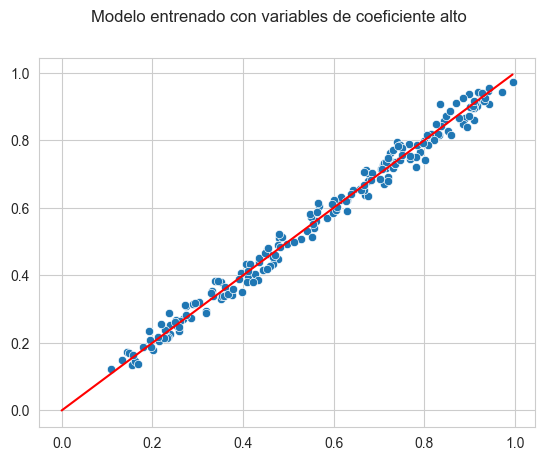

In [49]:
#minimizando variables incluyendo solo las que presentan un coeficiente alto
columnasX = ["Square_Footage","Year_Built"]
x = data2[columnasX].values
y = data2["House_Price"].values
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print("Scores:")
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))
print()

#comparando los precios reales con los predecidos
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.linspace(0,max(trainY)),y=np.linspace(0,max(trainY)),color=(1,0,0))
plt.suptitle("Modelo entrenado con variables de coeficiente alto")

Scores:
0.9832086102224807
0.9799413701424915



Text(0.5, 0.98, 'Modelo entrenado con Square_Footage')

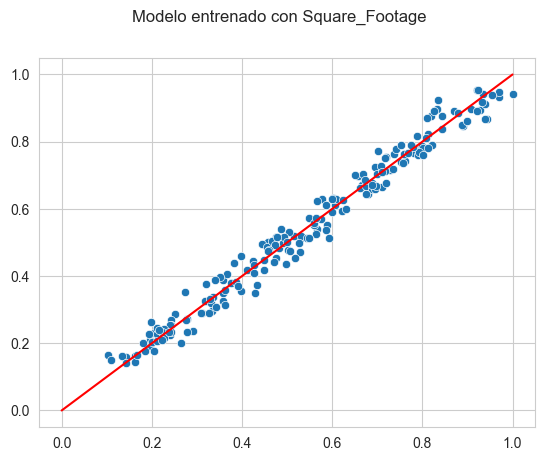

In [56]:
#entrenando al modelo con solo la variable que resalta en el pairplot
columnasX = ["Square_Footage"]
x = data2[columnasX].values
y = data2["House_Price"].values
linearModel = linear.LinearRegression()
trainX,testX,trainY,testY = split(x,y,train_size=0.2)
linearModel.fit(trainX,trainY)

#viendo que tan bueno es el modelo
print("Scores:")
print(linearModel.score(testX,testY))
print(linearModel.score(trainX,trainY))
print()

#comparando los precios reales con los predecidos
yPredict = linearModel.predict(trainX)
sb.scatterplot(x=trainY,y=yPredict)
sb.lineplot(x=np.linspace(0,max(trainY)),y=np.linspace(0,max(trainY)),color=(1,0,0))
plt.suptitle("Modelo entrenado con Square_Footage")